## Probability Based

In [1]:
import pandas as pd

In [2]:
ord('a')

97

#### "ord"实现单字符的unicode编码

In [6]:
chr(97)

'a'

### "chr"返回单字符unicode序号的解码 0 <=序号 <= 0x10ffff.

## UniGram

In [1]:
!ls

10k_articles.txt  lecture 2.ipynb.bak  spiralmemory.py
80k_articles.txt  lecture3.ipynb       zhwiki-latest-pages-articles.xml.bz2
assignments	  newlecture2.ipynb
lecture 2.ipynb   README.md


In [29]:
filename = "80k_articles.txt"

In [30]:
all_characters = open(filename,encoding="utf-8").read()

In [31]:
all_characters[:100]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球'

In [26]:
import re

In [27]:
def tokenize(string):
    sentence = re.findall("[\w|\d]+",string)
    return "".join(sentence)

In [32]:
tokenized_characters = tokenize(all_characters)

In [25]:
tokenized_characters[:100]

'新华社照片东莞广东2017年4月7日n体育9篮球CBA总决赛第四场广东对阵新疆n4月7日广东东莞银行队球员易建联在比赛中扣篮n当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东'

In [33]:
from collections import Counter

In [34]:
L = [1, 2, 3, 3, 4, 4, 4]

In [35]:
Counter(L)

Counter({1: 1, 2: 1, 3: 2, 4: 3})

In [36]:
counted_characters_most_common = Counter(tokenized_characters).most_common()

In [37]:
import matplotlib as plt

In [38]:
from matplotlib.pyplot import xscale, yscale, title, plot

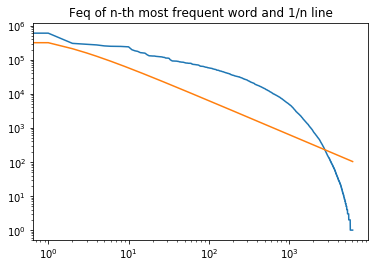

In [39]:
xscale("log")
yscale("log")
title("Feq of n-th most frequent word and 1/n line")
plot([c for (w, c) in counted_characters_most_common])
plot([counted_characters_most_common[0][1]/i for i in range(1, len(counted_characters_most_common))])

In [40]:
all_counted_characters = Counter(tokenized_characters)

In [41]:
all_counted_characters.values

<function Counter.values>

In [50]:
def get_character_prob(all_counted_characters):
    occorence = sum(all_counted_characters.values())
    def get_prob(char):
        return all_counted_characters[char]/occorence
    return get_prob

In [51]:
get_character_probability = get_character_prob(all_counted_characters )

In [37]:
get_character_probability("的")

0.021378959070387043

In [48]:
def get_string_prob(string):
    return reduce(mul,[get_character_probability(c) for c in string])

In [44]:
get_string_prob("这是一个比较罕见的测试用例")

7.90015462660161e-39

In [43]:
from functools import reduce

In [44]:
from operator import mul, add

In [45]:
reduce(add, range(1,101))

5050

In [46]:
reduce(lambda x, y: x + y, range(5))

10

In [52]:
get_string_prob("这是一个比较常见的测用例")

3.727527045606534e-34

In [22]:
pair1 = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

In [23]:
pairs = [pair1, pair2, pair3]

In [24]:
def get_probability_prefromance(language_model_func, pairs):
    for (p1, p2) in pairs:
        print('*'*18)
        print('\t\t {} with probability {}'.format(p1, language_model_func(tokenize(p1))))
        print('\t\t {} with probability {}'.format(p2, language_model_func(tokenize(p2))))

In [50]:
get_probability_prefromance(get_string_prob, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 1.2205917468406523e-31
		 前天晚上吃早饭的时候 with probability 1.4203006420690778e-31
******************
		 正是一个好看的小猫 with probability 3.2525875244545557e-25
		 真是一个好看的小猫 with probability 1.0219933874960867e-25
******************
		 我无言以对，简直 with probability 3.7422941328709655e-22
		 我简直无言以对 with probability 3.7422941328709655e-22


## 2-Gram

In [56]:
all_counted_two_characters = Counter(tokenized_characters[i : i+2] for i in range(len(tokenized_characters)-2))

In [66]:
get_pair_prob = get_character_prob(all_counted_two_characters)

In [53]:
all_counted_two_characters

Counter({'新华': 135490,
         '华社': 129104,
         '社照': 45003,
         '照片': 46712,
         '片东': 235,
         '东莞': 1543,
         '莞广': 195,
         '广东': 5182,
         '东2': 922,
         '20': 123427,
         '01': 102583,
         '17': 81801,
         '7年': 59051,
         '年4': 21904,
         '4月': 51236,
         '月7': 3777,
         '7日': 12919,
         '日n': 48360,
         'n体': 18616,
         '体育': 27169,
         '育9': 438,
         '9篮': 75,
         '篮球': 5154,
         '球C': 416,
         'CB': 1003,
         'BA': 5552,
         'A总': 939,
         '总决': 1968,
         '决赛': 16108,
         '赛第': 6484,
         '第四': 2788,
         '四场': 474,
         '场广': 176,
         '东对': 83,
         '对阵': 2153,
         '阵新': 88,
         '新疆': 4703,
         '疆n': 134,
         'n4': 23273,
         '日广': 727,
         '东东': 634,
         '莞银': 555,
         '银行': 9538,
         '行队': 935,
         '队球': 10498,
         '球员': 13102,
         '员易': 71,
         '易建

In [54]:
from operator import mul

In [55]:
def get_bigram_string_prob(string):
    probability = []
    for i, c in enumerate(string):
        prev = '<s>' if i == 0 else string[i-1]
        probability.append(get_bigram_prob(prev, c))
    return reduce(mul, probability)
                           
def get_bigram_prob(prev, word):
    if get_pair_prob(prev + word) > 0:
        return get_pair_prob(prev + word) / get_character_probability(word)
    else:
        return get_character_probability(word)

In [54]:
get_probability_prefromance(get_bigram_string_prob, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 1.1340644945683873e-21
		 前天晚上吃早饭的时候 with probability 2.8955606747907483e-21
******************
		 正是一个好看的小猫 with probability 1.46319423582528e-18
		 真是一个好看的小猫 with probability 9.878628055882517e-20
******************
		 我无言以对，简直 with probability 1.1228678064808719e-19
		 我简直无言以对 with probability 1.9170913769185622e-20


In [4]:
re.compile?

In [2]:
import re

In [3]:
re.comple?

Object `re.comple` not found.


In [22]:
import re                                                                                                                   
import sys
import codecs
    
def myfun(input_file):
    p1 = re.compile('-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
    p2 = re.compile('[\(][，；。？！\s]*[)\)]')
    p3 = re.compile('[「『]')
    p4 = re.compile('[」』]')
    outfile = codecs.open('input_file', 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub('\2', line)
            line = p2.sub('', line)
            line = p3.sub('“', line)
            line = p4.sub('”', line)
            outfile.write(line)
    outfile.close()


In [24]:
!ls

10k_articles.txt  lecture2.ipynb       wikiextractor
80k_articles.txt  lecture 2.ipynb.bak  zhwiki-latest-pages-articles.xml
assignments	  README.md
input_file	  spiralmemory.py


In [23]:
myfun('10k_articles.txt')

In [21]:
!echo input_file

input_file


In [6]:
content = open('wikiextractor/extracted/AA/zh_wiki').read()

In [10]:
content[:1000]

'<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">\n数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。\n\n基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。\n\n今日，数学使用在不同的领域中，包括科学、工程、医学和经济学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。\n\n西方语言中“数学”（）一词源自于古希腊语的（），其有“学习”、“学问”、“科学”，以及另外还有个较狭义且技术性的意思－「数学研究」，即使在其语源内。其形容词（），意思为"和学习有关的"或"用功的"，亦会被用来指"数学的"。其在英语中表面上的复数形式，及在法语中的表面复数形式\'，可溯至拉丁文的中性复数\'，由西塞罗译自希腊文复数（），此一希腊语被亚里士多德拿来指「万物皆数」的概念。\n\n汉字表示的「数学」一词大约产生于中国宋元时期。多指象数之学，但有时也含有今天上的数学意义，例如，秦九韶的《数学九章》（《永乐大典》记，即《数书九章》也被宋代周密所著的《癸辛杂识》记为《数学大略》）、《数学通轨》（明代柯尚迁著）、《数学钥》（清代杜知耕著）、《数学拾遗》（清代丁取忠撰）。直到1939年，经过中国数学名词审查委员会研究“算学”与“数学”两词的使用状况后，确认以“数学”表示今天意义上的数学含义。\n\n数学有着久远的历史。它被认为起源于人类

In [8]:
Counter(content).most_common()

[('，', 15663481),
 ('\n', 14582900),
 ('的', 10033008),
 ('i', 9711567),
 ('。', 9163579),
 ('1', 7522650),
 ('"', 6653254),
 (' ', 6371337),
 ('0', 5937458),
 ('d', 5722401),
 ('t', 5251070),
 ('2', 5195275),
 ('o', 4593327),
 ('r', 4489661),
 ('/', 4337200),
 ('=', 4177028),
 ('年', 4153441),
 ('9', 4050577),
 ('e', 4003590),
 ('c', 3680448),
 ('、', 3598873),
 ('3', 3524044),
 ('5', 3260773),
 ('一', 3207254),
 ('在', 3170545),
 ('为', 3069560),
 ('l', 3060137),
 ('4', 2970987),
 ('8', 2928417),
 ('a', 2860467),
 ('是', 2822502),
 ('中', 2810623),
 ('6', 2802650),
 ('.', 2800957),
 ('国', 2767412),
 ('u', 2749379),
 ('h', 2714258),
 ('7', 2709288),
 ('人', 2645630),
 ('p', 2394713),
 ('k', 2313046),
 ('（', 2300266),
 ('）', 2297322),
 ('w', 2251636),
 ('于', 2240802),
 ('大', 2149031),
 ('>', 2121297),
 ('<', 2120028),
 ('有', 2084754),
 ('s', 1975892),
 ('和', 1728605),
 ('以', 1626189),
 ('月', 1545890),
 ('日', 1536202),
 ('后', 1507535),
 ('学', 1470626),
 ('了', 1448714),
 ('时', 1424135),
 ('g', 140

In [9]:
import re

In [14]:
regx = re.compile("<.+>|\\n|\（.*?\）|[「“”‘’\"《》」]")

In [16]:
revised_content = regx.sub("",content)

In [17]:
revised_content[:1000]

"数学数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。今日，数学使用在不同的领域中，包括科学、工程、医学和经济学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。西方语言中数学一词源自于古希腊语的，其有学习、学问、科学，以及另外还有个较狭义且技术性的意思－数学研究，即使在其语源内。其形容词，意思为和学习有关的或用功的，亦会被用来指数学的。其在英语中表面上的复数形式，及在法语中的表面复数形式'，可溯至拉丁文的中性复数'，由西塞罗译自希腊文复数，此一希腊语被亚里士多德拿来指万物皆数的概念。汉字表示的数学一词大约产生于中国宋元时期。多指象数之学，但有时也含有今天上的数学意义，例如，秦九韶的数学九章、数学通轨、数学钥、数学拾遗。直到1939年，经过中国数学名词审查委员会研究算学与数学两词的使用状况后，确认以数学表示今天意义上的数学含义。数学有着久远的历史。它被认为起源于人类早期的生产活动：中国古代的六艺之一就有数，数学一词在西方有希腊语词源，意思是学问的基础，源于。史前的人类就已尝试用自然的法则来衡量物质的多少、时间的长短等抽象的数量关系，比如时间单位有日、季节和年等。算术也自然而然地产生了。古代的石碑及泥版亦证实了当时已有几何的知识。更进一步则需要写作或其他可记录数字的系统，如符木或于印加帝国内用来储存数据的奇普。历史上曾有过许多不同的记数系统。在最初有历史记录的时候，

In [19]:
Counter(revised_content).most_common(100)

[('，', 15405921),
 ('的', 9894378),
 ('。', 9152101),
 ('1', 5224055),
 ('0', 4287529),
 ('年', 3736341),
 ('、', 3456475),
 ('2', 3443236),
 ('一', 3146380),
 ('在', 3131619),
 ('为', 2996865),
 ('是', 2779149),
 ('中', 2729956),
 ('国', 2672737),
 ('人', 2588484),
 ('9', 2532938),
 (' ', 2392430),
 ('于', 2211869),
 ('大', 2060593),
 ('有', 2051128),
 ('和', 1681277),
 ('3', 1608548),
 ('以', 1601575),
 ('5', 1577682),
 ('8', 1495873),
 ('后', 1477871),
 ('月', 1474071),
 ('日', 1450974),
 ('4', 1450025),
 ('了', 1440107),
 ('时', 1391046),
 ('个', 1380410),
 ('6', 1365627),
 ('学', 1342240),
 ('会', 1328438),
 ('7', 1311838),
 ('地', 1297973),
 ('成', 1260369),
 ('上', 1206604),
 ('公', 1201837),
 ('e', 1189135),
 ('不', 1185991),
 ('出', 1149559),
 ('a', 1130505),
 ('行', 1127756),
 ('他', 1127317),
 ('部', 1102618),
 ('斯', 1094897),
 ('之', 1048475),
 ('与', 1043716),
 ('区', 1025322),
 ('发', 993384),
 ('其', 985850),
 ('主', 983487),
 ('作', 968117),
 ('o', 961756),
 ('生', 958364),
 ('尔', 953215),
 ('分', 940923),
 ('方

In [63]:
all_counted_two_characters = Counter(revised_content[i : i+2] for i in range(len(revised_content)-2))

In [65]:
all_counted_two_characters.most_common(100)

[('20', 1476505),
 ('19', 1343640),
 ('00', 1112600),
 ('01', 774897),
 ('。1', 650426),
 ('一个', 644766),
 ('年，', 583023),
 ('10', 492735),
 ('中国', 471680),
 ('。2', 466006),
 ('的一', 465965),
 ('，并', 457266),
 ('后，', 387545),
 ('0年', 383315),
 ('，但', 381003),
 ('。在', 380945),
 ('12', 373824),
 ('人口', 348818),
 ('，是', 346345),
 ('年1', 344155),
 ('日，', 343693),
 ('11', 342622),
 ('，在', 341986),
 ('18', 325705),
 ('位于', 318387),
 ('99', 316067),
 ('公里', 314030),
 ('美国', 308862),
 ('月1', 299448),
 ('5年', 285787),
 ('，而', 284977),
 ('6年', 281187),
 ('8年', 280185),
 ('人，', 278798),
 ('7年', 273477),
 ('1年', 269011),
 ('月2', 264831),
 ('于1', 264348),
 ('，其', 263336),
 ('可以', 263153),
 ('4年', 260524),
 ('，他', 257951),
 ('15', 257870),
 ('大学', 257267),
 ('2年', 256606),
 ('9年', 255682),
 ('3年', 254342),
 ('是一', 250742),
 ('公司', 250231),
 ('，以', 246082),
 ('月，', 246047),
 ('地区', 244415),
 ('平方', 243571),
 ('日本', 243006),
 ('政府', 241795),
 ('98', 239707),
 ('第一', 238936),
 ('成为', 237761),
 ('使用', 236

In [70]:
all_counted_characters = Counter(content)

In [71]:
all_counted_characters.most_common(100)

[('，', 15663481),
 ('\n', 14582900),
 ('的', 10033008),
 ('i', 9711567),
 ('。', 9163579),
 ('1', 7522650),
 ('"', 6653254),
 (' ', 6371337),
 ('0', 5937458),
 ('d', 5722401),
 ('t', 5251070),
 ('2', 5195275),
 ('o', 4593327),
 ('r', 4489661),
 ('/', 4337200),
 ('=', 4177028),
 ('年', 4153441),
 ('9', 4050577),
 ('e', 4003590),
 ('c', 3680448),
 ('、', 3598873),
 ('3', 3524044),
 ('5', 3260773),
 ('一', 3207254),
 ('在', 3170545),
 ('为', 3069560),
 ('l', 3060137),
 ('4', 2970987),
 ('8', 2928417),
 ('a', 2860467),
 ('是', 2822502),
 ('中', 2810623),
 ('6', 2802650),
 ('.', 2800957),
 ('国', 2767412),
 ('u', 2749379),
 ('h', 2714258),
 ('7', 2709288),
 ('人', 2645630),
 ('p', 2394713),
 ('k', 2313046),
 ('（', 2300266),
 ('）', 2297322),
 ('w', 2251636),
 ('于', 2240802),
 ('大', 2149031),
 ('>', 2121297),
 ('<', 2120028),
 ('有', 2084754),
 ('s', 1975892),
 ('和', 1728605),
 ('以', 1626189),
 ('月', 1545890),
 ('日', 1536202),
 ('后', 1507535),
 ('学', 1470626),
 ('了', 1448714),
 ('时', 1424135),
 ('g', 140

In [72]:
get_pair_prob = get_character_prob(all_counted_two_characters)

In [73]:
get_character_probability = get_character_prob(all_counted_characters )

In [74]:
get_probability_prefromance(get_bigram_string_prob, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 2.8326409979458834e-22
		 前天晚上吃早饭的时候 with probability 3.682164493822792e-23
******************
		 正是一个好看的小猫 with probability 5.195886431850197e-18
		 真是一个好看的小猫 with probability 2.3027865241977573e-19
******************
		 我无言以对，简直 with probability 5.834585633782258e-20
		 我简直无言以对 with probability 5.577717083867316e-21
